# Emotion Recognition in Speech Using Deep Learning Techniques

## Audio Feature Extraction for Emotion Recognition

This script is designed to extract audio features from a dataset of emotional speech. The dataset is organized into multiple folders, each representing a different speaker, with audio files categorized by emotions. 

This dataset contains 350 parallel utterances spoken by 10 native Mandarin speakers, and 10 English speakers with 5 emotional states (neutral, happy, angry, sad and surprise). In total `35000` audio files.

![Emotion Recognition Dataset Previw](/home/sputniktech/Documents/repos_school/emotion-speech-recognition/1-s2.0-S0167639321001308-gr6.jpg)

Here's an overview of the process:

1. Set Up the Directory: 
   - The base directory containing the dataset is defined.
   - The dataset is expected to have a specific structure: each speaker has a dedicated folder containing subfolders for different emotions.

2. Initialize Data Storage:
   - An empty list, data, is created to store the features and labels extracted from the audio files.

3. Iterate Through Speaker Folders:
   - The script iterates over each speaker's folder within the base directory.
   - For each speaker, it reads a text file that contains mappings of audio filenames to their corresponding emotional labels.

4. Extract Audio Features:
   - The script processes each audio file in the emotion folders.
   - Using the librosa library, it extracts various features from the audio files, including Mel-frequency cepstral coefficients (MFCCs), root mean square energy (RMSE), and delta MFCCs.
   - These features are stacked and averaged to create a single feature vector for each audio file.

5. Label Assignment:
   - Each audio file is labeled with the correct emotion based on the mapping obtained from the text file.

6. Data Compilation:
   - The extracted features and corresponding emotion labels are compiled into a Pandas DataFrame.
   - This DataFrame, df, is ready for further processing and can be used for training machine learning models for emotion recognition.

### Exception Handling

- The script includes error handling to manage issues like missing files or extraction errors, ensuring robustness in data processing.

### Output

- The final output is a DataFrame where each row represents an audio file, with columns for extracted features and the associated emotion label.

This script lays the foundation for building and training a model to recognize emotions from speech, leveraging audio signal processing and machine learning techniques.

In [2]:
import librosa
import os
import pandas as pd
import numpy as np

# Define the base directory
base_dir = '/home/sputniktech/Documents/repos/speach_client/Emotion Speech Dataset'

# Initialize a list to store data
data = []

# Iterate over each speaker's folder
for speaker_folder in os.listdir(base_dir):
    speaker_path = os.path.join(base_dir, speaker_folder)

    # Read the corresponding text file for the speaker
    mapping_file = os.path.join(speaker_path, f"{speaker_folder}.txt")
    mapping = {}
    with open(mapping_file, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) == 3:
                # Append ".wav" to the filename from the text file for matching
                mapping[parts[0].strip() + ".wav"] = parts[2].strip()
            else:
                print(f"Skipping malformed line: {line}")

    # Process each audio file in the emotion folders
    for emotion_folder in os.listdir(speaker_path):
        emotion_path = os.path.join(speaker_path, emotion_folder)
        if os.path.isdir(emotion_path):
            for audio_file in os.listdir(emotion_path):
                file_path = os.path.join(emotion_path, audio_file)

                # Check if the audio file (with extension) is in the mapping
                if audio_file in mapping:
                    try:
                        # Load audio file
                        y, sr = librosa.load(file_path, sr=None)

                        # Extract features
                        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=512, n_fft=2048)
                        rmse = librosa.feature.rms(y=y)
                        delta_mfccs = librosa.feature.delta(mfccs)
                        features = np.vstack([mfccs, rmse, delta_mfccs])
                        features_processed = np.mean(features.T, axis=0)

                        # Append the features and the correct emotion label to the data list
                        data.append([features_processed, mapping[audio_file]])
                    except Exception as e:
                        print(f"Error processing file {audio_file}: {e}")

# Convert to a Pandas DataFrame
df = pd.DataFrame(data, columns=['Features', 'Emotion'])

# Now df is your dataset ready for further processing and model training

#### Print contents of the df

In [3]:
df

,Features,Emotion
0,"[-443.1167, 79.86927, -11.561895, -11.114016, ...",中立
1,"[-502.90384, 71.63669, 11.010788, 13.273278, -...",中立
2,"[-451.9417, 86.073135, -17.975052, -6.333088, ...",中立
3,"[-522.5552, 77.80032, 12.032263, 36.361702, -7...",中立
4,"[-493.06525, 76.43695, 15.720276, 19.993347, -...",中立
...,...,...
34995,"[-403.73975, 93.79292, -5.1764183, 4.589072, -...",Sad
34996,"[-398.40228, 78.802505, -4.832762, -9.325793, ...",Sad
34997,"[-415.57315, 79.529526, 9.140786, 13.50155, 2....",Sad
34998,"[-458.92953, 88.643074, -12.271878, 21.847431,...",Sad


#### Import Libraries and Load Data

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.layers import Bidirectional

2023-12-08 03:17:58.366878: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-08 03:17:58.421643: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-08 03:17:58.421693: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-08 03:17:58.423397: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-08 03:17:58.434135: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-08 03:17:58.434663: I tensorflow/core/platform/cpu_feature_guard.cc:1

## Data Preparation for Model Training

This section of the script is dedicated to preparing the dataset for training the emotion recognition model. It involves several steps to process the features and labels extracted from the audio files:

1. **Feature and Label Extraction**:
   - `X` is created as an array of features extracted from the `Features` column of the DataFrame `df`.
   - `y` holds the emotion labels from the `Emotion` column of the DataFrame.

2. **One-hot Encoding of Labels**:
   - The emotion labels in `y` are converted from categorical text labels to a one-hot encoded format using `LabelEncoder` and `to_categorical`.
   - This transformation is necessary for categorical classification in neural networks.

3. **Reshaping Features for Conv1D**:
   - The features in `X` are reshaped to fit the input requirements of a 1D convolutional layer (`Conv1D`).
   - The reshaping format is (-1, number of features, 1), aligning with the (samples, timesteps, features) structure expected by `Conv1D`.

4. **Splitting the Dataset**:
   - The dataset is split into training, validation, and test sets.
   - Initially, `X` and `y` are split into training (`X_train`, `y_train`) and a temporary test set (`X_temp`, `y_temp`), with 30% of the data reserved for testing.
   - The temporary test set is further split equally into validation (`X_val`, `y_val`) and test sets (`X_test`, `y_test`).

The outcome of this process is a set of arrays ready for feeding into the neural network: training, validation, and test sets, each containing features and corresponding labels in a format suitable for model training and evaluation.


In [5]:
# Assuming df['Features'] is a list of features and df['Emotion'] are the labels
X = np.array(df['Features'].tolist())
y = df['Emotion'].values

# One-hot encoding for emotion labels
label_encoder = LabelEncoder()
y_int = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_int)

# Reshaping for Conv1D input
X_reshaped = X.reshape(-1, X.shape[1], 1)  # Reshape to (samples, timesteps, features)

# Splitting the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_categorical, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## Enhanced Model Architecture for Emotion Recognition

This section details the architecture of an advanced neural network model developed for the task of emotion recognition from audio data. The model combines convolutional and recurrent layers, specifically designed to capture the intricate patterns in audio signals.

1. **Enhanced Convolutional Layers (Conv1D)**:
   - The model utilizes 1D convolutional layers, which are particularly effective for feature extraction from time-series data like audio.
   - **First Conv1D Layer**: Consists of 64 filters with a kernel size of 3. This is followed by batch normalization (to normalize the activations) and max-pooling (to reduce the spatial dimensions), and a dropout of 0.3 for regularization.
   - **Second Conv1D Layer**: Increases the complexity with 128 filters. Batch normalization and max-pooling are again applied, followed by a dropout layer.

2. **Bi-directional LSTM Layers**:
   - Following the convolutional layers, the model includes Bi-directional Long Short-Term Memory (LSTM) layers. Bi-directional LSTMs process the data in both forward and backward directions, enhancing the model's ability to understand the context in the audio data.
   - The model incorporates two Bi-directional LSTM layers, each with 256 units, equipped with dropout and recurrent dropout to mitigate overfitting.

3. **Dense Layers for Classification**:
   - Post LSTM layers, the model's output is flattened and passed through dense layers for the final classification.
   - A dense layer with 512 neurons is employed, utilizing L2 regularization to further control overfitting. This is followed by a dropout layer.
   - The final dense layer has a number of units equal to the number of emotion classes, with a softmax activation function for class probability prediction.

4. **Model Compilation**:
   - The Adam optimizer is used for its efficiency and adaptability in handling various types of data and neural architectures.
   - The loss function is `categorical_crossentropy`, apt for multi-class classification problems.
   - A learning rate scheduler (`ReduceLROnPlateau`) is implemented, reducing the learning rate when the validation loss stops improving, thereby fine-tuning the training process.

The design of this model, with its combination of Conv1D and Bi-directional LSTM layers, is tailored to capture both the spectral and temporal features in emotional speech, making it highly suitable for emotion recognition tasks.


In [6]:
# Model Building
model = Sequential()

# Increased complexity in Convolutional layers
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# Bi-directional LSTM layers
model.add(Bidirectional(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.1)))
model.add(Bidirectional(LSTM(256, dropout=0.3, recurrent_dropout=0.1)))

# Dense layers for classification
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compiling the model
optimizer = Adam(learning_rate=0.001)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

2023-12-08 03:18:01.991781: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-08 03:18:01.992584: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


#### Model summary

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 25, 64)            256       
                                                                 
 batch_normalization (Batch  (None, 25, 64)            256       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 12, 64)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           24704     
                                                                 
 batch_normalization_1 (Bat  (None, 10, 128)           5

## Training the model


In [8]:
# Training the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[lr_scheduler])


Epoch 1/50
766/766 [==============================] - 125s 144ms/step - loss: 2.0201 - accuracy: 0.3201 - val_loss: 1.4598 - val_accuracy: 0.4469 - lr: 0.0010
Epoch 2/50
766/766 [==============================] - 132s 172ms/step - loss: 1.4714 - accuracy: 0.4742 - val_loss: 1.2111 - val_accuracy: 0.5876 - lr: 0.0010
Epoch 3/50
766/766 [==============================] - 168s 219ms/step - loss: 1.2904 - accuracy: 0.5607 - val_loss: 1.0008 - val_accuracy: 0.6703 - lr: 0.0010
Epoch 4/50
766/766 [==============================] - 177s 231ms/step - loss: 1.1659 - accuracy: 0.6165 - val_loss: 0.9224 - val_accuracy: 0.6994 - lr: 0.0010
Epoch 5/50
766/766 [==============================] - 191s 249ms/step - loss: 1.0847 - accuracy: 0.6470 - val_loss: 0.8361 - val_accuracy: 0.7423 - lr: 0.0010
Epoch 6/50
766/766 [==============================] - 182s 238ms/step - loss: 1.0244 - accuracy: 0.6721 - val_loss: 0.8290 - val_accuracy: 0.7381 - lr: 0.0010
Epoch 7/50
766/766 [==========================

## Model Evaluation and Confusion Matrix Analysis

After training the emotion recognition model, it's crucial to evaluate its performance on a set of unseen data (the test set) and analyze the results for deeper insights. The following steps are performed for this purpose:

1. **Model Evaluation**:
   - The trained model is evaluated on the test set, which consists of audio features (`X_test`) and their corresponding true labels (`y_test`).
   - The `evaluate` function of the model returns the loss and accuracy on the test set. The test accuracy is printed, providing a quantitative measure of the model's performance.

2. **Generating Predictions**:
   - The model predicts the emotions for each feature set in `X_test`.
   - `predict` function of the model outputs the probabilities of each class, from which the class with the highest probability (predicted class) is selected using `argmax`.

3. **Confusion Matrix Creation**:
   - A confusion matrix is constructed to visualize the performance of the model in detail.
   - It compares the actual labels (`y_true`) against the predicted labels (`y_pred_classes`) for each instance in the test set.
   - The matrix is visualized using `seaborn`'s heatmap, providing an intuitive display of the model's performance across different classes.

4. **Analysis of the Confusion Matrix**:
   - The confusion matrix helps in identifying not just the overall accuracy, but also the specific areas where the model excels or struggles.
   - For example, it can reveal if the model is consistently misclassifying a particular emotion, indicating potential areas for further improvement or data imbalance.



165/165 [==============================] - 5s 30ms/step - loss: 0.5166 - accuracy: 0.8318
Test accuracy: 0.8318095207214355
165/165 [==============================] - 5s 26ms/step


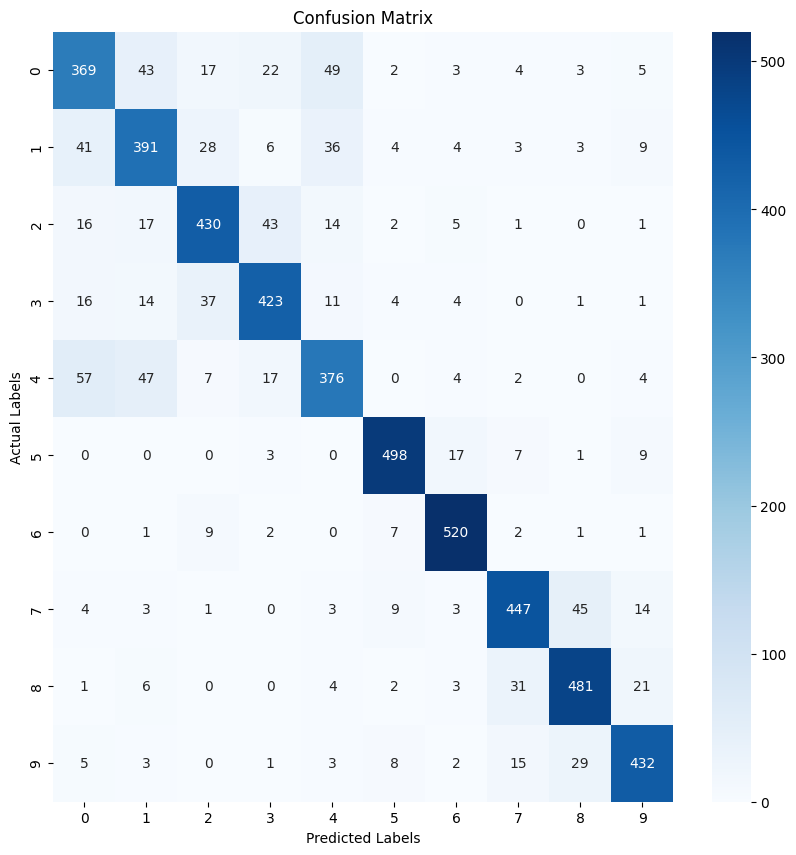

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


165/165 [==============================] - 7s 44ms/step - loss: 0.5166 - accuracy: 0.8318
Test accuracy: 0.8318095207214355
165/165 [==============================] - 7s 44ms/step


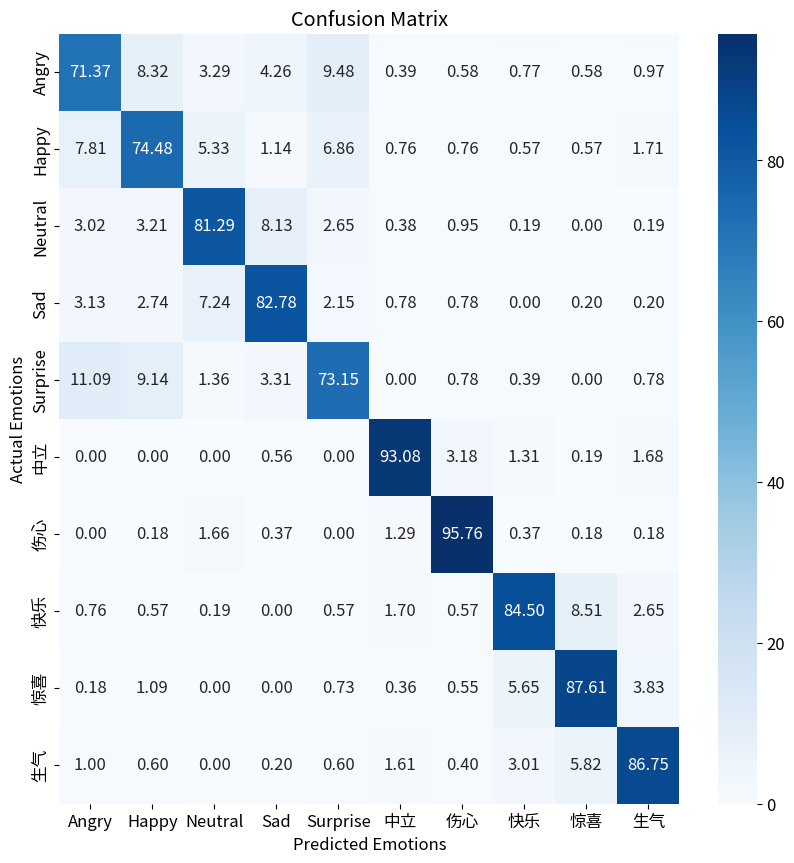

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Set the font to Noto Sans CJK
matplotlib.rcParams['font.family'] = 'Noto Sans CJK JP'
matplotlib.rcParams['font.size'] = 12

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Normalizing the confusion matrix to show percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Emotion labels (replace these with your actual emotion labels)
emotion_labels = label_encoder.classes_

plt.figure(figsize=(10, 10))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.title("Confusion Matrix")
plt.ylabel('Actual Emotions')
plt.xlabel('Predicted Emotions')
plt.show()


#### Classification Report Visualization:

First, get the classification report:

In [13]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)


<Axes: >

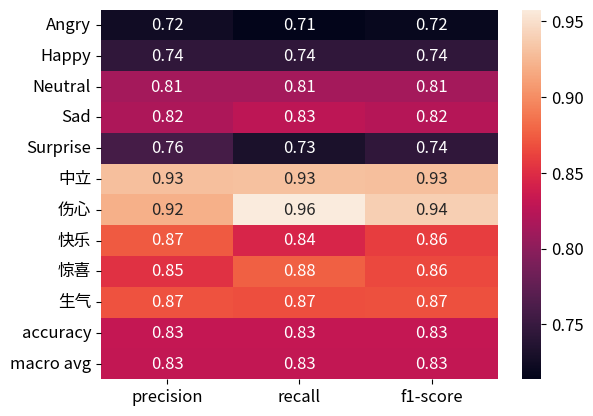

In [14]:
import seaborn as sns
import pandas as pd

report_df = pd.DataFrame(report).transpose()
sns.heatmap(report_df.iloc[:-1, :].drop(['support'], axis=1), annot=True)


#### ROC Curve:

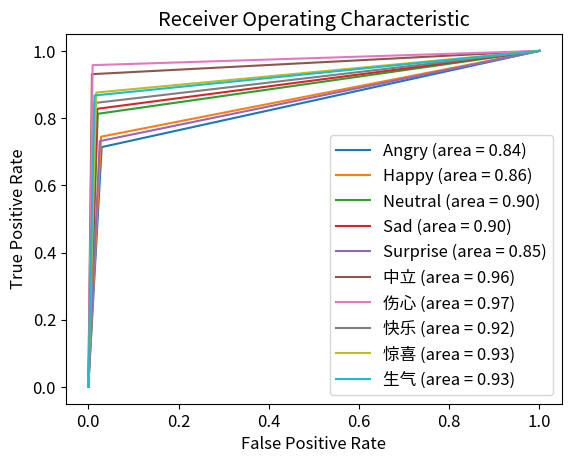

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output labels
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))
y_pred_bin = label_binarize(y_pred_classes, classes=np.arange(len(label_encoder.classes_)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure()
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'{label_encoder.classes_[i]} (area = {roc_auc[i]:0.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


#### Learning Curve:

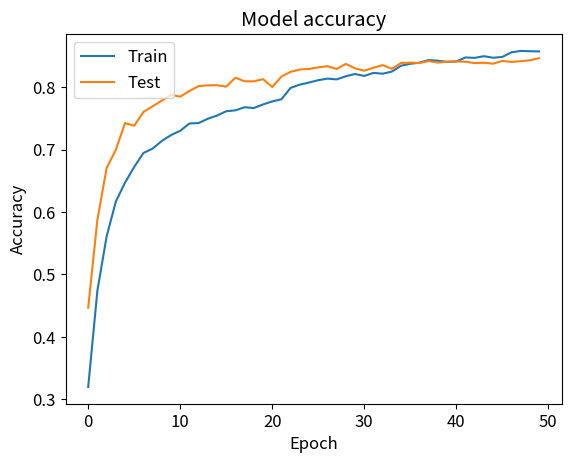

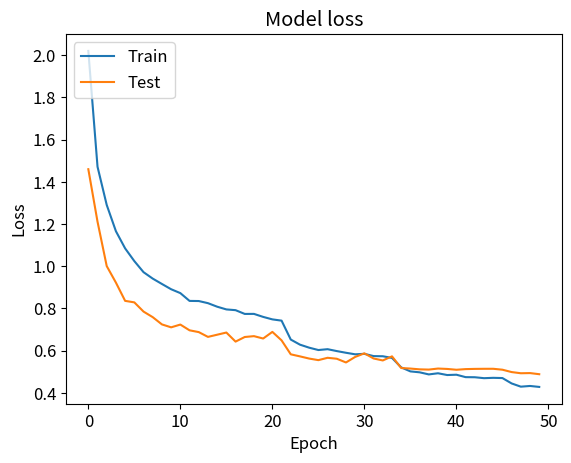

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
